# 对Pronto共享单车数据集进行数据分析

简介：在大致分析了数据表之后，我认为可以从如下方向对数据进行分析：
- 天气：分析西雅图的天气是否适合开展共享单车业务
- 用户：分析该公司的用户结构
- 站点：分析各站点的繁忙程度

因此，本次数据分析将有五幅图：天气情况图、年卡用户的性别结构图、用户的年龄结构图、时段繁忙图，以及站点繁忙图。

In [15]:
# 导入库
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

## 天气：
在进行数据分析之前，我通过查询资料了解到，西雅图位于北纬48°，西经122°，西面临海，是典型的温带海洋性气候。因此，该地全年温度不会太高，常有海风与雾天，所以，在进行分析时可以把温度与风速忽略，着重看天气情况。
下面开始数据分析：

In [16]:
# 导入数据
weather = pd.read_csv('weather.csv')
# 删除不必要的数据
weather = weather.drop(weather.columns[1:5], axis=1, inplace=False)
# 提取2015全年天气数据并重建索引
weather2015 = weather.loc[80:364]
weather2015 = weather2015.reset_index(drop=True)
weather2015.index = weather2015.index + 1

In [17]:
weather2015

,Date,Events
1,1/1/2015,NaN
2,1/2/2015,NaN
3,1/3/2015,Rain
4,1/4/2015,Rain
5,1/5/2015,Rain
...,...,...
281,10/8/2015,NaN
282,10/9/2015,"Fog , Rain"
283,10/10/2015,Rain
284,10/11/2015,NaN


In [19]:
# 统计全年的天气情况
wet_day = weather2015[['Events']]

In [20]:
wet_day['Events'].value_counts()

Rain                   91
Fog                     7
Fog , Rain              7
Rain , Thunderstorm     3
Name: Events, dtype: int64

- **下面开始作图：**

In [21]:
# 首先，提取各月的天气情况
# 把日期作为索引，以方便提取
weather2015.set_index('Date', inplace=True)

mon1 = weather2015.loc['1/1/2015':'1/31/2015']
mon2 = weather2015.loc['2/1/2015':'2/28/2015']
mon3 = weather2015.loc['3/1/2015':'3/31/2015']
mon4 = weather2015.loc['4/1/2015':'4/30/2015']
mon5 = weather2015.loc['5/1/2015':'5/31/2015']
mon6 = weather2015.loc['6/1/2015':'6/30/2015']
mon7 = weather2015.loc['7/1/2015':'7/31/2015']
mon8 = weather2015.loc['8/1/2015':'8/31/2015']
mon9 = weather2015.loc['9/1/2015':'9/30/2015']
mon10 = weather2015.loc['10/1/2015':'10/12/2015']

# 输出各月天气情况
def print_month():
    print(mon1, mon2, mon3, mon4, mon5, mon6, mon7, mon8, mon9, mon10)


In [44]:
print_month()

               Events
Date                 
1/1/2015          NaN
1/2/2015          NaN
1/3/2015         Rain
1/4/2015         Rain
1/5/2015         Rain
1/6/2015          Fog
1/7/2015          NaN
1/8/2015          Fog
1/9/2015   Fog , Rain
1/10/2015        Rain
1/11/2015  Fog , Rain
1/12/2015        Rain
1/13/2015         NaN
1/14/2015         NaN
1/15/2015        Rain
1/16/2015         NaN
1/17/2015        Rain
1/18/2015        Rain
1/19/2015        Rain
1/20/2015         NaN
1/21/2015         Fog
1/22/2015        Rain
1/23/2015        Rain
1/24/2015         NaN
1/25/2015         NaN
1/26/2015         Fog
1/27/2015        Rain
1/28/2015         NaN
1/29/2015         NaN
1/30/2015         Fog
1/31/2015         Fog                Events
Date                 
2/1/2015         Rain
2/2/2015         Rain
2/3/2015   Fog , Rain
2/4/2015   Fog , Rain
2/5/2015         Rain
2/6/2015         Rain
2/7/2015         Rain
2/8/2015         Rain
2/9/2015         Rain
2/10/2015        Rain
2/11/2015 

In [22]:
# 创建类    
class Month:
    def __init__(self):
        self.mon_s1 = mon1.value_counts()
        self.mon_s2 = mon2.value_counts()
        self.mon_s3 = mon3.value_counts()
        self.mon_s4 = mon4.value_counts()
        self.mon_s5 = mon5.value_counts()
        self.mon_s6 = mon6.value_counts()
        self.mon_s7 = mon7.value_counts()
        self.mon_s8 = mon8.value_counts()
        self.mon_s9 = mon9.value_counts()
        self.mon_s10 = mon10.value_counts()

    def mon_situation(self):

        situation = [self.mon_s1, self.mon_s2, self.mon_s3, self.mon_s4, self.mon_s5, self.mon_s6, self.mon_s7,
                     self.mon_s8, self.mon_s9, self.mon_s10]

        return situation

    def get_situation(self):
        for number in range(10):
            print(f"第{number+1}月的天气情况：\n{self.mon_situation()[number]}")    
 
          

In [23]:
Month().get_situation()

第1月的天气情况：
Events    
Rain          12
Fog            6
Fog , Rain     2
dtype: int64
第2月的天气情况：
Events    
Rain          16
Fog , Rain     2
dtype: int64
第3月的天气情况：
Events    
Rain          15
Fog , Rain     2
dtype: int64
第4月的天气情况：
Events
Rain      18
dtype: int64
第5月的天气情况：
Events
Rain      5
dtype: int64
第6月的天气情况：
Events             
Rain                   3
Rain , Thunderstorm    1
dtype: int64
第7月的天气情况：
Events
Rain      4
dtype: int64
第8月的天气情况：
Events             
Rain                   5
Rain , Thunderstorm    2
dtype: int64
第9月的天气情况：
Events
Rain      10
dtype: int64
第10月的天气情况：
Events    
Rain          3
Fog           1
Fog , Rain    1
dtype: int64


In [38]:
# 数据导入列表（没有的用0填充）
rain_data = []
rain_fog_data = []
rain_thunderstorm_data = []

for element in total_situation:
    rain_data.append(element['Rain'])
    if "Fog , Rain" in element:
        rain_fog_data.append(element["Fog , Rain"])
    else:
        rain_fog_data.append(0)
    if "Rain , Thunderstorm" in element:
        rain_thunderstorm_data.append(element["Rain , Thunderstorm"])
    else:
        rain_thunderstorm_data.append(0)

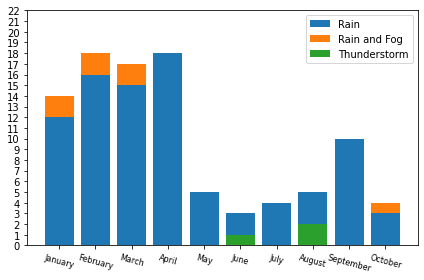

In [39]:
# 横坐标的标签
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']
#绘制堆叠条形图
plt.bar(range(len(rain_data)), rain_data, tick_label=labels, label="Rain")
plt.bar(range(len(rain_data)), rain_fog_data, bottom=rain_data, label="Rain and Fog")
plt.bar(range(len(rain_data)), rain_thunderstorm_data, bottom=rain_fog_data, label="Thunderstorm")
# 增加图例
plt.legend()
# 设置刻度范围
y_ticks = np.arange(23)
plt.yticks(y_ticks)
# 解决标签重叠的问题
plt.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=-15)
plt.tight_layout()

- 结论：西雅图气候全年湿润，雨雾天气多，并不适合开展共享单车业务

## 用户
分析购买了年卡的用户的年龄结构以及年龄段情况

In [48]:
# 导入数据、清除空值，以及转换数据类型
users = pd.read_csv('trip.csv')
users = users.dropna(how='any')
users[['birthyear']] = users[['birthyear']].astype('int')

- **绘制性别比例图：**

In [49]:
# 提取性别和出生年份的列
birth_and_gender = users[['gender', 'birthyear']]

In [50]:
# 统计性别情况
gender_situation = birth_and_gender['gender'].value_counts()

num_male = gender_situation['Male']
num_female = gender_situation['Female']
num_other = gender_situation['Other']
total_num = [num_male, num_female, num_other]

In [51]:
total_num

[67608, 18245, 1507]

Text(0.5, 1.0, 'Gender')

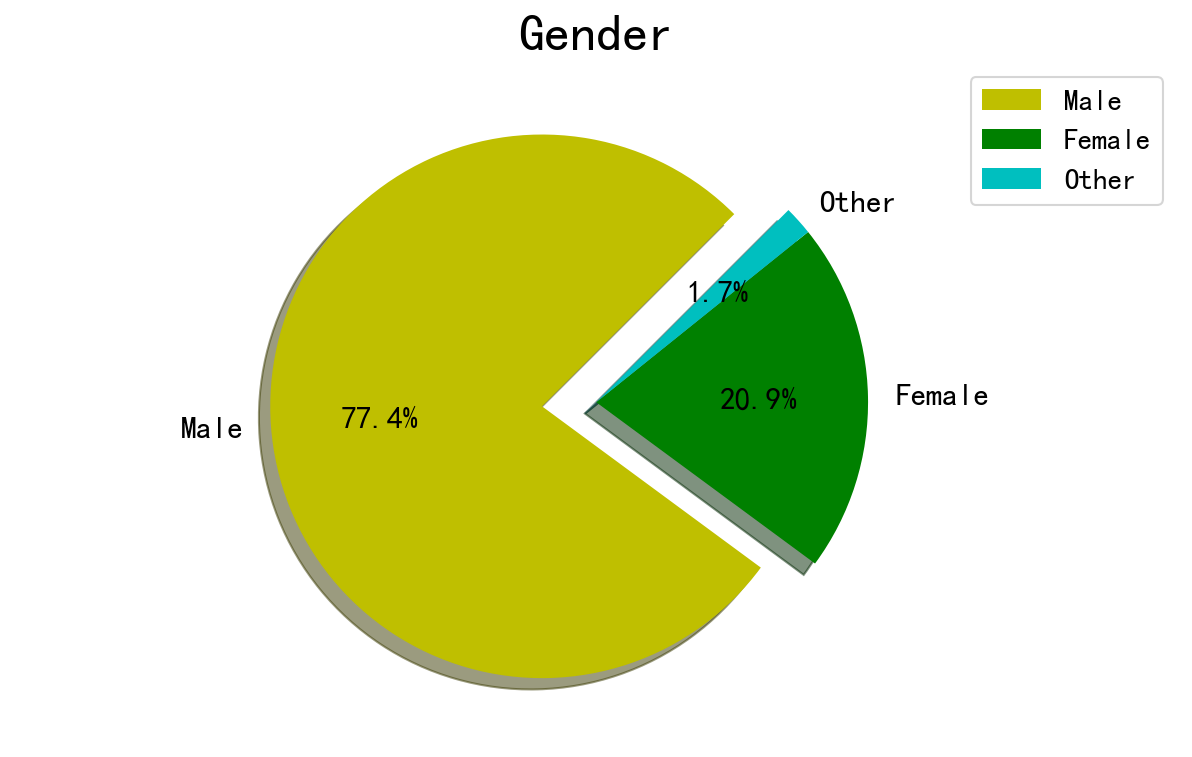

In [52]:
# 绘制饼图
# 建立画布，调整分辨率
plt.figure(figsize=(10, 6), dpi=150)
# 使坐标轴等长（使图更圆）
plt.axis('equal')
# 绘制饼图
plt.pie(total_num, labels=['Male', 'Female', 'Other'], autopct='%.1f%%', colors=['y', 'g', 'c'],
        textprops={'fontsize': 15}, labeldistance=1.1, explode=(0.2, 0.0, 0.0),
        startangle=45, shadow=True)
# 添加图例，并调整字体大小
plt.legend(fontsize=14)
# 增加标题
plt.title("Gender", fontsize=25)

- **绘制年龄层分布图：**

In [54]:
# 将性别与年龄结合
male_birth = birth_and_gender[birth_and_gender['gender'] == 'Male']['birthyear']
female_birth = birth_and_gender[birth_and_gender['gender'] == 'Female']['birthyear']

In [55]:
total_num

[67608, 18245, 1507]

In [56]:
# 重建索引
male_birth = male_birth.sort_values()
male_birth.index = range(67608)
male_birth.index = male_birth.index + 1

female_birth = female_birth.sort_values()
female_birth.index = range(18245)
female_birth.index = female_birth.index + 1

In [57]:
male_birth

1        1936
2        1936
3        1936
4        1936
5        1936
         ... 
67604    1997
67605    1997
67606    1997
67607    1998
67608    1998
Name: birthyear, Length: 67608, dtype: int32

In [58]:
female_birth

1        1946
2        1946
3        1946
4        1946
5        1946
         ... 
18241    1998
18242    1998
18243    1999
18244    1999
18245    1999
Name: birthyear, Length: 18245, dtype: int32

In [59]:
# 导入数据
male_30s = []
male_40s = []
male_50s = []
male_60s = []
male_70s = []
male_80s = []
male_90s = []

for number in male_birth:

        if number <= 1939:
                male_30s.append(number)
        elif number <= 1949:
                male_40s.append(number)
        elif number <= 1959:
                male_50s.append(number)
        elif number <= 1969:
                male_60s.append(number)
        elif number <= 1979:
                male_70s.append(number)
        elif number <= 1989:
                male_80s.append(number)
        elif number <= 1999:
                male_90s.append(number)

female_30s = []
female_40s = []
female_50s = []
female_60s = []
female_70s = []
female_80s = []
female_90s = []

for number in female_birth:

        if number <= 1939:
                female_30s.append(number)
        elif number <= 1949:
                female_40s.append(number)
        elif number <= 1959:
                female_50s.append(number)
        elif number <= 1969:
                female_60s.append(number)
        elif number <= 1979:
                female_70s.append(number)
        elif number <= 1989:
                female_80s.append(number)
        elif number <= 1999:
                female_90s.append(number)

# 统计各年龄段人数                
male_birth_data = np.array([len(male_30s), len(male_40s), len(male_50s), len(male_60s), len(male_70s), len(male_80s),
                   len(male_90s)])
female_birth_data = np.array([len(female_30s), len(female_40s), len(female_50s), len(female_60s), len(female_70s),
                     len(female_80s), len(female_90s)])                

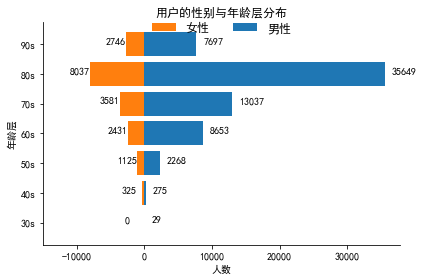

In [60]:
# 开始作图
# 绘制正负条形图
male_barh = plt.barh(range(len(male_birth_data)), male_birth_data)
female_barh = plt.barh(range(len(female_birth_data)), -female_birth_data)
# 纵坐标的标签
y_labels = ['30s', '40s', '50s', '60s', '70s', '80s', '90s']
plt.yticks(range(len(y_labels)), y_labels)
# 隐藏上边框与右边框
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.title('用户的性别与年龄层分布')
plt.xlabel("人数")
plt.ylabel("年龄层")
#设置图例
plt.legend((female_barh, male_barh), ('女性', '男性'), fontsize=12,
           bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=2, frameon=False)
#给图中数据加标签
for number in range(len(male_birth_data)):
        plt.text(male_birth_data[number]+1000, number, male_birth_data[number])

for number in range(len(female_birth_data)):
        plt.text(-female_birth_data[number]-2950, number, female_birth_data[number])
        
# 设置x轴的最小值        
plt.xlim(-15000)        
# 自适应        
plt.tight_layout()        

## 站点繁忙情况
分析各个时段的总体繁忙情况与各个站点的繁忙情况
我认为，通过车位的空闲情况可以反映出站点的繁忙情况，因为，空的车位越多，代表越多的人从这里取车

- 绘制时段繁忙图：

In [29]:
# 导入数据，删除不必要的列
status = pd.read_csv('status.csv')
status_time = status.drop(['bikes_available', 'bikes_blocked', 'docks_blocked', 'station_id'], axis=1)

In [30]:
# 把时间作为索引，以便提取
status_time = status_time.set_index('time')
# 将某一工作日的数据作为例子
day_16 = status_time.loc['2014/10/16 0:00':'2014/10/16 23:59']

In [26]:
status_time

,docks_available
time,
2014/10/15 8:29,16
2014/10/15 8:29,12
2014/10/15 8:29,8
2014/10/15 8:29,11
2014/10/15 8:29,10
...,...
2014/10/30 3:40,11
2014/10/30 3:40,8
2014/10/30 3:40,7


In [27]:
day_16

,docks_available
time,
2014/10/16 0:00,11
2014/10/16 0:00,6
2014/10/16 0:00,8
2014/10/16 0:00,8
2014/10/16 0:00,12
...,...
2014/10/16 23:59,13
2014/10/16 23:59,9
2014/10/16 23:59,7


In [31]:
# 将16日分成24小时，然后计算每小时的可用车位数的平均值，并把平均值存到字典里，最后24个平均值存进数组里
hour = {
    'hour1': day_16.loc['2014/10/16 0:00':'2014/10/16 0:59'].mean(),
    'hour2': day_16.loc['2014/10/16 1:00':'2014/10/16 1:59'].mean(),
    'hour3': day_16.loc['2014/10/16 2:00':'2014/10/16 2:59'].mean(),
    'hour4': day_16.loc['2014/10/16 3:00':'2014/10/16 3:59'].mean(),
    'hour5': day_16.loc['2014/10/16 4:00':'2014/10/16 4:59'].mean(),
    'hour6': day_16.loc['2014/10/16 5:00':'2014/10/16 5:59'].mean(),
    'hour7': day_16.loc['2014/10/16 6:00':'2014/10/16 6:59'].mean(),
    'hour8': day_16.loc['2014/10/16 7:00':'2014/10/16 7:59'].mean(),
    'hour9': day_16.loc['2014/10/16 8:00':'2014/10/16 8:59'].mean(),
    'hour10': day_16.loc['2014/10/16 9:00':'2014/10/16 9:59'].mean(),
    'hour11': day_16.loc['2014/10/16 10:00':'2014/10/16 10:59'].mean(),
    'hour12': day_16.loc['2014/10/16 11:00':'2014/10/16 11:59'].mean(),
    'hour13': day_16.loc['2014/10/16 12:00':'2014/10/16 12:59'].mean(),
    'hour14': day_16.loc['2014/10/16 13:00':'2014/10/16 13:59'].mean(),
    'hour15': day_16.loc['2014/10/16 14:00':'2014/10/16 14:59'].mean(),
    'hour16': day_16.loc['2014/10/16 15:00':'2014/10/16 15:59'].mean(),
    'hour17': day_16.loc['2014/10/16 16:00':'2014/10/16 16:59'].mean(),
    'hour18': day_16.loc['2014/10/16 17:00':'2014/10/16 17:59'].mean(),
    'hour19': day_16.loc['2014/10/16 18:00':'2014/10/16 18:59'].mean(),
    'hour20': day_16.loc['2014/10/16 19:00':'2014/10/16 19:59'].mean(),
    'hour21': day_16.loc['2014/10/16 20:00':'2014/10/16 20:59'].mean(),
    'hour22': day_16.loc['2014/10/16 21:00':'2014/10/16 21:59'].mean(),
    'hour23': day_16.loc['2014/10/16 22:00':'2014/10/16 22:59'].mean(),
    'hour24': day_16.loc['2014/10/16 23:00':'2014/10/16 23:59'].mean()
}

mean_data = []
for key, i in hour.items():
    mean_data.append(i)

# 保险起见，转换一下数据类型    
mean_data = list(mean_data)
# 生成含有0-23整数的列表
number = list(range(len(mean_data)))    

In [32]:
mean_data

[docks_available    9.47
 dtype: float64,
 docks_available    9.463667
 dtype: float64,
 docks_available    9.46
 dtype: float64,
 docks_available    9.473462
 dtype: float64,
 docks_available    9.48
 dtype: float64,
 docks_available    9.467458
 dtype: float64,
 docks_available    9.326667
 dtype: float64,
 docks_available    9.365333
 dtype: float64,
 docks_available    9.251525
 dtype: float64,
 docks_available    8.961333
 dtype: float64,
 docks_available    8.982373
 dtype: float64,
 docks_available    9.202
 dtype: float64,
 docks_available    9.164667
 dtype: float64,
 docks_available    9.15322
 dtype: float64,
 docks_available    9.294
 dtype: float64,
 docks_available    9.408475
 dtype: float64,
 docks_available    9.363729
 dtype: float64,
 docks_available    9.466667
 dtype: float64,
 docks_available    9.288421
 dtype: float64,
 docks_available    9.353333
 dtype: float64,
 docks_available    9.133667
 dtype: float64,
 docks_available    9.130508
 dtype: float64,
 docks_

Text(0.5, 0, '时间')

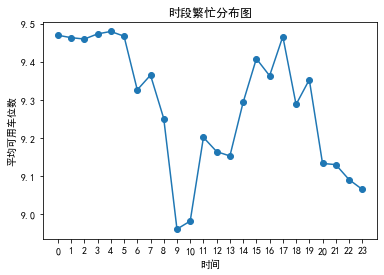

In [33]:
# 开始绘图
plt.plot(number, mean_data, '-o') # 线段为实线，特殊点为圆点
# 横坐标的设置
x_ticks = np.arange(24) 
plt.xticks(x_ticks)

plt.title('时段繁忙分布图')
plt.ylabel("平均可用车位数")
plt.xlabel("时间")

- 绘制站点繁忙情况图：

In [35]:
# 录入数据
status_station = status.drop(['bikes_available', 'bikes_blocked', 'docks_blocked', 'time'], axis=1)
# 把站点id作为索引
status_station = status_station.set_index("station_id")

In [36]:
status_station

,docks_available
station_id,
1,16
2,12
3,8
4,11
5,10
...,...
46,11
47,8
48,7


In [37]:
# 绘图前的预处理（在处理中发现第51号及其以后的站点没有出现在表中，因此这里只提取1-50号站点的数据）
data_station = []
# 计算各个站点可用车位数的平均值，把它转化为浮点型（不转会报错），然后存进列表
for number in list(range(50)):
    data_station.append((float)(status_station.loc[number+1].mean()))
    
# 把列表转化成数组
data_station = np.array(data_station)

In [38]:
data_station

array([ 7.90250763,  7.97482838,  8.57346491,  6.75924867,  9.50858124,
       10.05744661, 10.5713196 ,  9.76096491,  9.32089054,  6.70933448,
        8.82529459,  5.66032609,  7.94603356,  7.1786804 ,  8.86728306,
       15.35020976,  7.51234744,  8.65174485,  8.05563501, 10.39969489,
       16.45981121,  6.27950992,  8.23979786,  8.97311213,  9.33943555,
       10.69226735,  7.40608314,  8.30406178,  8.22692601,  7.85874333,
        8.46696224,  8.51668574, 10.11880244,  6.04643402,  9.70571129,
       10.40756102,  4.80577803,  8.06521739,  8.92658276,  6.47635393,
        7.86560831,  7.44846491,  5.43602212,  8.50376621,  6.18626049,
       10.35430969,  6.86713387,  8.50419527, 10.04195271, 10.02507628])

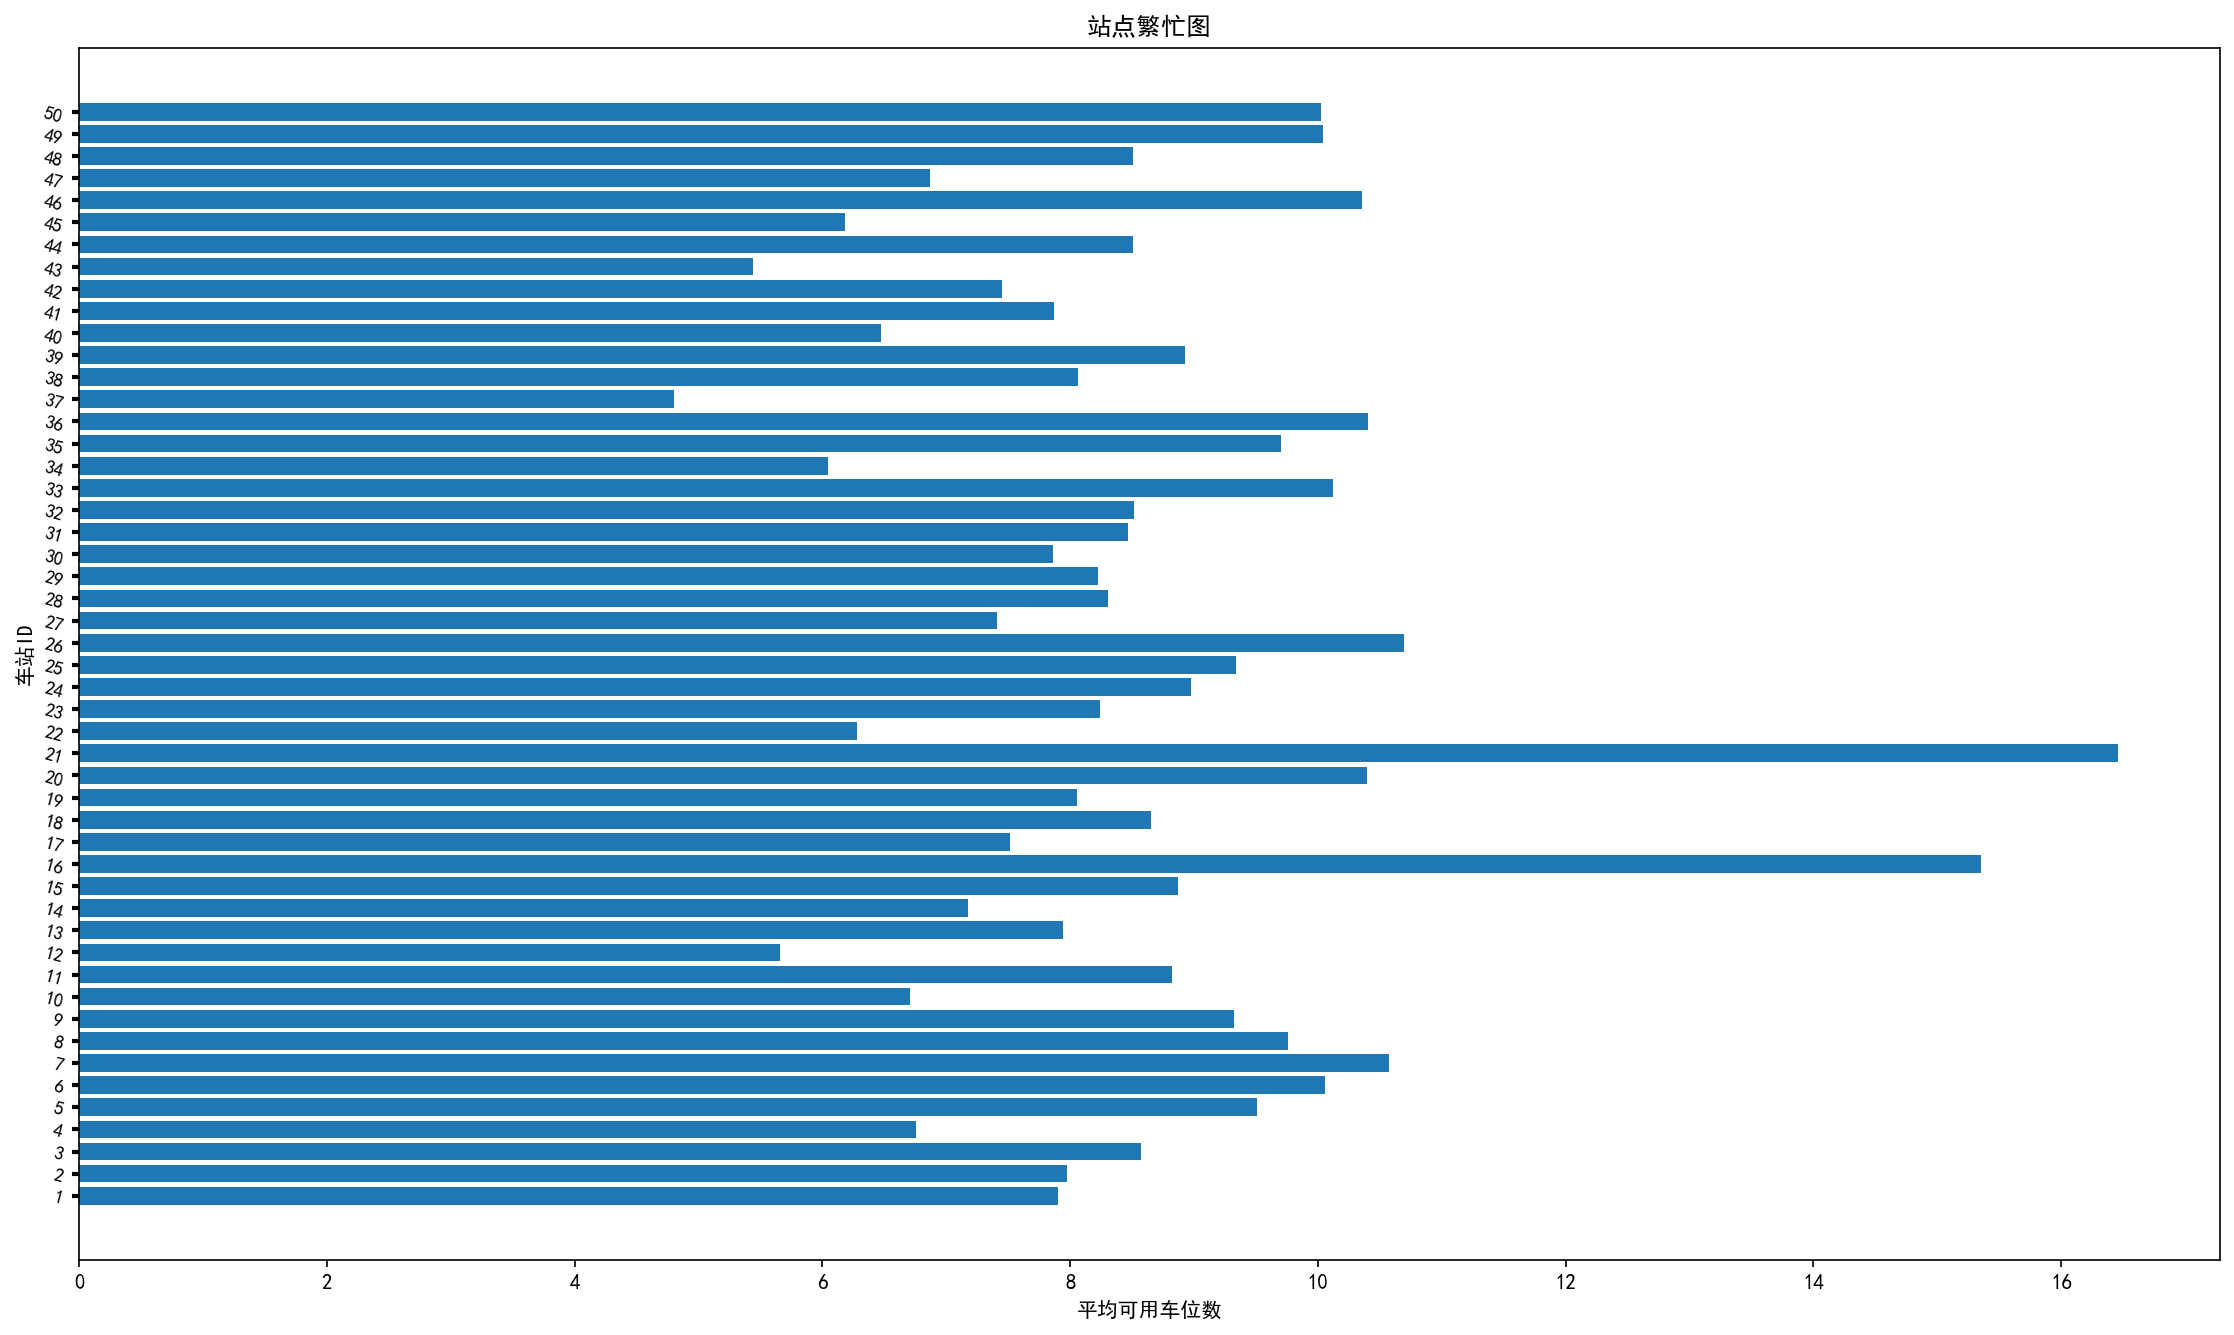

In [39]:
# 绘图
# 创建1*1的子图，设置画布大小及分辨率
fig, ax = plt.subplots(1, 1, figsize=(15, 9), dpi=150)

plt.barh(range(len(data_station)), data_station)

y_ticks = list(range(1, 51))
plt.yticks(range(len(data_station)), y_ticks, rotation=-15)
# 设置y轴标签的宽度及字体的大小
plt.tick_params(axis='y', width=2, labelsize=9)

plt.ylabel("车站ID")
plt.xlabel("平均可用车位数")
plt.title("站点繁忙图")
plt.tight_layout()

In [42]:
station = pd.read_csv("station.csv")
station = station.drop(["id", "terminal", "lat", "long", "dockcount", "online"], axis=1)
station.index = station.index+1

In [43]:
station

,name
1,3rd Ave & Broad St
2,2nd Ave & Vine St
3,6th Ave & Blanchard St
4,2nd Ave & Blanchard St
5,2nd Ave & Pine St
6,7th Ave & Union St
7,City Hall / 4th Ave & James St
8,Pine St & 9th Ave
9,2nd Ave & Spring St
10,Summit Ave & E Denny Way


## 数据分析函数汇总

- **导入**：`pd.read_csv('weather.csv')`weather是文件名（文件在工程文件目录下就直接写名字，不在就写具体位置）
- **添加索引**： `weather.set_index('number', inplace=True)`意为将weather数据的名为number的列设置为索引,且代替之前的索引（前面不要加上`weather.index = `,这样会报错，这样做是修改原来index的数值（数据类型**不同**就报错了））
- **删除空值**

  1. `users = users.dropna(how='any')`删除带有空值的行

- **Dataframe中列的数据类型的转换:**

  1. `users[['birthyear']] = users[['birthyear']].astype('int')`意为将该dataframe中的birthyear列中的数据转为整型（**不能转空值**，转多个列在`'birthyear'`后加`,`）

- **删除特定列**

  1. 直接删除（永久性）`del weather['name']`(没用过...)
  2. 用切片（前提是知道具体的列数）`weather_copy1 = weather.drop(weather.columns[1:5], axis=1, inplace=False)`
  3. 用列的名字`weather_copy1 = weather.drop('name',axis=1,inplace=false)`（若改为true则原数组直接被替换）

- **提取数据**：

 1. 按标签提取（loc）：`weather.loc[11:101]`意为提取11行到101行的数据

    `weather2015.loc['1/1/2015':'1/31/2015']`意为提取1/1/2015所对的行到1/31/2015所对的行（**前提是先把Date设置成索引，否则报错**）（行中有重复值好像就提取到不含重复值的行的前一行）（若`''`中的内容格式不对，可以先把原来的dataframe打印出来，再复制上去）

 2. 提取特定的行：```wet_day = weather2015[weather2015['Events'] == 'Rain']```意为提取Events列中有Rain的行（但不知为什么加个'Fog'就报错）

  3. 提取特定列（返回的是**series**）：`birth_and_gender = users[['gender', 'birthyear']]`一定要加两个[]

     `male_birth = birth_and_gender[birth_and_gender['gender'] == 'Male']['birthyear']`提取了gender列中含有Male的对应的birthyear列，但series中并没有名为birthyear的列，只是名字叫birthyear

- **统计某一列的元素个数**：`rain_days = wet_day['Events'].value_counts()`（value_counts（）函数会统计该列不同元素出现的次数，返回的是**series**）

- **重建索引（同时删除之前的索引），并使下标从一开始：**

  ```python
  weather2015 = weather2015.reset_index(drop=True)
  weather2015.index = weather2015.index + 1
  ```

- **排序：**

  1. 对series：`male_birth = male_birth.sort_values()`赋值号一定不要丢，否则修改无效。（该series只有一列）

- **用matplotlib画条形图**

  1. 生成柱状图：`plt.bar(range(len(rain_data)), rain_data, tick_label=labels)`参数依次对应横坐标、纵坐标、横坐标的标签值。用`plt.show()`打印
  2. 解决标签重叠的问题：   
     1. 调整标签字体的大小：`plt.tick_params(axis='x', labelsize=8)`
     2. 自适应（会自动调整大小、位置等，但不一定有满意的结果）：`plt.tight_layout()`
     3. 标签旋转：`plt.xticks(rotation=-15)`

  - **画正负条形图：**

    1. 生成正负条形图：

   ```python
  plt.barh(range(len(male_birth_data)), male_birth_data)
  plt.barh(range(len(female_birth_data)), -female_birth_data)
   ```

   纵坐标一定要为整数，否则图像会变为两大块并列的颜色区间。注意：list加不了+-运算符，得先转为ndarray

    2. 获取坐标轴，并隐藏掉一部分（把颜色设为none即可）：

   ```python
  	ax = plt.gca() # 获取四个坐标轴信息,ax即为axes（axis的复数）
  	ax.spines['right'].set_color('none')
  	ax.spines['top'].set_color('none') 
   ```

    3. 坐标轴刻度的改变（设置坐标轴）：

   ```python
  	y_ticks = ['30s', '40s', '50s', '60s', '70s', '80s', '90s']
  	plt.yticks(range(len(y_labels)), y_labels)
   ```

    4. 在坐标轴旁加上标签加以解释：

   ```python
  plt.xlabel("人数")
  plt.ylabel("年龄层")
   ```

    5. 给图中的点（即数据）加标签：

   ```python
  for number in range(len(male_birth_data)):
        plt.text(male_birth_data[number]+1000, number, 		male_birth_data[number])
  for number in range(len(female_birth_data)):
        plt.text(-female_birth_data[number]-1800, number, female_birth_data[number])
  
   ```

   本次用到的参数：plt.text(x,y)第三个为数据。前两个分别控制其在x轴，y轴的位置。详见[csdn](https://blog.csdn.net/zengbowengood/article/details/104324293?ops_request_misc=%7B%22request%5Fid%22%3A%22163759679216780264098736%22%2C%22scm%22%3A%2220140713.130102334..%22%7D&request_id=163759679216780264098736&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_positive~default-1-104324293.first_rank_v2_pc_rank_v29&utm_term=plt.text&spm=1018.2226.3001.4187)

    6. 图例的设置：

   ```python
  plt.legend((female_barh, male_barh), ('女性', '男性'), fontsize=12,
          bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=2, frameon=False)
   ```

   `(female_barh, male_barh)`意为先从左到右依次显示的是female_barh, male_barh的内容（即对应的颜色）
   `('女性', '男性')`意为从左到右各内容（颜色块）的名字

  `bbox_to_anchor=(0.5, 1.05), loc='upper center'`共同控制图例所处的位置，详见[csdn](https://blog.csdn.net/chichoxian/article/details/101058046?ops_request_misc=%7B%22request%5Fid%22%3A%22163750622816780255230281%22%2C%22scm%22%3A%2220140713.130102334..%22%7D&request_id=163750622816780255230281&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_positive~default-1-101058046.first_rank_v2_pc_rank_v29&utm_term=bbox_to_anchor&spm=1018.2226.3001.4187)

  `ncol=2`意为一行显示两个图例

  `frameon=False`意为去除图例的边框

  7. 设置坐标轴的最小值（或范围）：

     ```python
     plt.xlim(-15000)
     ```

     - 注意：正负条形图不能用yticks/xticks设置坐标轴

  - **画堆叠柱状图:**

    ```python
    plt.bar(range(len(rain_data)), rain_data, tick_label=labels, label="Rain")
    plt.bar(range(len(rain_data)), rain_fog_data, bottom=rain_data, label="Rain and Fog")
    plt.bar(range(len(rain_data)), rain_thunderstorm_data, bottom=rain_fog_data, label="Thunderstorm")
    ```

    把bottom选好就行

- **用matplotlib画饼图**

  1. 生成饼图：

 ```python
plt.pie(total_num, labels=['Male', 'Female', 'Other'], autopct='%.1f%%', colors=['m', 'g', 'c'],
        textprops={'fontsize': 12}, labeldistance=1.1, explode=(0.2, 0.0, 0.0),
        startangle=45, shadow=True)
 ```

 - 参数依次为：
   饼图中各部分的数值
   labels:饼图各部分对应的名字
   autopct：展现比的数值。保留1位小数：`autopct='%.1f%%'`（.前面可加数字表示宽度）
   colors:各部分的颜色
   textprops：设置饼图中文本的属性，如字体大小、颜色等
   labeldistance：设置各扇形标签（图例）与圆心的距离
   explode：指定饼图某些部分的突出显示，即呈现爆炸式
   startangle：设置饼图的初始摆放角度（逆时针转）
   shadow：是否添加饼图的阴影效果

  2. `plt.axis('equal')`意为使坐标轴等长（使圆形更像圆）
  3. `plt.legend(fontsize=11)`用来加上图例，并设置字体大小
  4. `plt.title("Gender", fontsize=25)`加上标题并设置字体大小
  5. `plt.figure(figsize=(10,6), dpi=150)`figsize:设置图的宽和高，单位为英寸；dpi:设置绘图对象的分辨率。详见[csdn](https://blog.csdn.net/baoziqyp/article/details/111239877?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522163740812516780271917736%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=163740812516780271917736&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_positive~default-1-111239877.first_rank_v2_pc_rank_v29&utm_term=plt.figure&spm=1018.2226.3001.4187)

- **用matplotlib画折线图：**

  1. 生成折线图：

     ```python
     plt.plot(number, mean_data, '-o')
     ```

     参数依次为横纵坐标，线的属性（`-o`意为画实线，标点为圆点，详见[csdn](https://blog.csdn.net/ywsydwsbn/article/details/115157882?ops_request_misc=&request_id=&biz_id=102&utm_term=matlab画折线图加标注&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-7-115157882.first_rank_v2_pc_rank_v29&spm=1018.2226.3001.4187)）

  2. 改变坐标的刻度：

     ```python
     x_ticks = np.arange(24)
     plt.xticks(x_ticks)
     ```

     使横坐标从0-24，单位长度为1

### 总结：

- 没有想好具体功能就不要建类 ；调用类中的函数先要把类实例化，即Month后面的括号不能丢`Month().get_situation()`
- Series其实与列表无异，只不过有索引，也能放多组数据？，因此想要提取特定索引对应的值，只需如`mon_s1['Rain']`一样，就能提取mon_s1这个series中索引为Rain对应的数值

- `users = users.dropna(how='any')`的赋值符号不能丢！！！否则为无效的修改
- `series[10:11]`指的是提取该series中索引10到11的数据，而不是提取10-11

- 列表前不能添加+-运算符，numpy的数组可以（因为是向量？）

```python
 	plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
	plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
```

- plt.rcParams用来自定义图形的各种默认属性。详见[plt.rcParams(csdn)](https://blog.csdn.net/weixin_39010770/article/details/88200298?ops_request_misc=%7B%22request%5Fid%22%3A%22163750326416780264094320%22%2C%22scm%22%3A%2220140713.130102334..%22%7D&request_id=163750326416780264094320&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduend~default-3-88200298.first_rank_v2_pc_rank_v29&utm_term=plt.rcParams['axes.unicode_minus']+%3D+False&spm=1018.2226.3001.4187)

- figure为一整张画布，而其中包含许多子图。有关`fig,ax = plt.subplots()`的信息详见[csdn](https://blog.csdn.net/htuhxf/article/details/82986440?ops_request_misc=%7B%22request%5Fid%22%3A%22163750827016780274117562%22%2C%22scm%22%3A%2220140713.130102334..%22%7D&request_id=163750827016780274117562&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_positive~default-1-82986440.first_rank_v2_pc_rank_v29&utm_term=plt.subplots()&spm=1018.2226.3001.4187)

- 提取series中符合条件的数据，并统计每组数据中的元素个数（暂时没有更好的办法）：

  ```python
  male_30s = []
  male_40s = []
  male_50s = []
  male_60s = []
  male_70s = []
  male_80s = []
  male_90s = []
  
  for number in male_birth:
  
          if number <= 1939:
                  male_30s.append(number)
          elif number <= 1949:
                  male_40s.append(number)
          elif number <= 1959:
                  male_50s.append(number)
          elif number <= 1969:
                  male_60s.append(number)
          elif number <= 1979:
                  male_70s.append(number)
          elif number <= 1989:
                  male_80s.append(number)
          elif number <= 1999:
                  male_90s.append(number)
  
  female_30s = []
  female_40s = []
  female_50s = []
  female_60s = []
  female_70s = []
  female_80s = []
  female_90s = []
  
  for number in female_birth:
  
          if number <= 1939:
                  female_30s.append(number)
          elif number <= 1949:
                  female_40s.append(number)
          elif number <= 1959:
                  female_50s.append(number)
          elif number <= 1969:
                  female_60s.append(number)
          elif number <= 1979:
                  female_70s.append(number)
          elif number <= 1989:
                  female_80s.append(number)
          elif number <= 1999:
                  female_90s.append(number)
  
  male_birth_data = np.array([len(male_30s), len(male_40s), len(male_50s), len(male_60s), len(male_70s), len(male_80s),
                     len(male_90s)])
  female_birth_data = np.array([len(female_30s), len(female_40s), len(female_50s), len(female_60s), len(female_70s),
                       len(female_80s), len(female_90s)])
  ```

- 行（axis=0）或列（axis=1）

- ```python
  number = list(range(len(mean_data))) + 1 #错误表达(只能另开一行+1)
  ```

- np.arange()函数返回一个有终点和起点的固定步长的排列，如：`a = np.arange(0,6,2)`表示起点为0（默认也为0），终点为6（则输出到5），步长为2（默认为1）.

- 分组存放平均值，最后输出成一个列表

  ```python
  hour = {
      'hour1': day_16.loc['2014/10/16 0:00':'2014/10/16 0:59'].mean(),
      'hour2': day_16.loc['2014/10/16 1:00':'2014/10/16 1:59'].mean(),
      'hour3': day_16.loc['2014/10/16 2:00':'2014/10/16 2:59'].mean(),
      'hour4': day_16.loc['2014/10/16 3:00':'2014/10/16 3:59'].mean(),
      'hour5': day_16.loc['2014/10/16 4:00':'2014/10/16 4:59'].mean(),
      'hour6': day_16.loc['2014/10/16 5:00':'2014/10/16 5:59'].mean(),
      'hour7': day_16.loc['2014/10/16 6:00':'2014/10/16 6:59'].mean(),
      'hour8': day_16.loc['2014/10/16 7:00':'2014/10/16 7:59'].mean(),
      'hour9': day_16.loc['2014/10/16 8:00':'2014/10/16 8:59'].mean(),
      'hour10': day_16.loc['2014/10/16 9:00':'2014/10/16 9:59'].mean(),
      'hour11': day_16.loc['2014/10/16 10:00':'2014/10/16 10:59'].mean(),
      'hour12': day_16.loc['2014/10/16 11:00':'2014/10/16 11:59'].mean(),
      'hour13': day_16.loc['2014/10/16 12:00':'2014/10/16 12:59'].mean(),
      'hour14': day_16.loc['2014/10/16 13:00':'2014/10/16 13:59'].mean(),
      'hour15': day_16.loc['2014/10/16 14:00':'2014/10/16 14:59'].mean(),
      'hour16': day_16.loc['2014/10/16 15:00':'2014/10/16 15:59'].mean(),
      'hour17': day_16.loc['2014/10/16 16:00':'2014/10/16 16:59'].mean(),
      'hour18': day_16.loc['2014/10/16 17:00':'2014/10/16 17:59'].mean(),
      'hour19': day_16.loc['2014/10/16 18:00':'2014/10/16 18:59'].mean(),
      'hour20': day_16.loc['2014/10/16 19:00':'2014/10/16 19:59'].mean(),
      'hour21': day_16.loc['2014/10/16 20:00':'2014/10/16 20:59'].mean(),
      'hour22': day_16.loc['2014/10/16 21:00':'2014/10/16 21:59'].mean(),
      'hour23': day_16.loc['2014/10/16 22:00':'2014/10/16 22:59'].mean(),
      'hour24': day_16.loc['2014/10/16 23:00':'2014/10/16 23:59'].mean()
  }
  
  mean_data = []
  for key, i in hour.items():
      mean_data.append(i)
  ```

- 将数据转换成数组前应先转换一下数据类型（否则可能报错：only size-1 arrays can be converted to Python scalars）

- ```python
  # 自适应最后再加最好
  plt.tight_layout()
  plt.show()
  ```

- 数据的导入（没有的用0填充）：

  ```python
  for element in total_situation:
      rain_data.append(element['Rain'])
      if "Fog , Rain" in element:
          rain_fog_data.append(element["Fog , Rain"])
      else:
          rain_fog_data.append(0)
      if "Rain , Thunderstorm" in element:
          rain_thunderstorm_data.append(element["Rain , Thunderstorm"])
      else:
          rain_thunderstorm_data.append(0)
  ```

  

